
# **Scaling, Re-sizing, Interpolations and Cropping**

1. How to re-size and scale images
2. Image Pyramids
3. Cropping

### **Re-sizing**

![](1.png)

Re-sizing is a simple function that we execute using the cv2.resize function, it's arguments are:

```cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)```
- if dsize is None the output image is calculated as a function of scaling using x & y scale 

#### **List of Interpolation Methods:**
- cv2.INTER_AREA - Good for shrinking or down sampling
- cv2.INTER_NEAREST - Fastest
- cv2.INTER_LINEAR - Good for zooming or up sampling (default)
- cv2.INTER_CUBIC - Better
- cv2.INTER_LANCZOS4 - Best

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


### **Types of re-scaling Methods in OpenCV**

- **INTER_NEAREST** – a nearest-neighbor interpolation
- **INTER_LINEAR** – a bilinear interpolation (used by default)
- **INTER_AREA** – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to theINTER_NEAREST method.
- **INTER_CUBIC** – a bicubic interpolation over 4×4 pixel neighborhood
- **INTER_LANCZOS4** – a Lanczos interpolation over 8×8 pixel neighborhood

See more on their performance - https://chadrick-kwag.net/cv2-resize-interpolation-methods/

In [ ]:
# load our input image
image = cv2.imread('image.jpeg')
imshow("Scaling - Linear Interpolation", image)

# If no interpolation is specified cv.INTER_LINEAR is used as default
# Let's make our image 3/4 of it's original size
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
imshow("0.75x Scaling - Linear Interpolation", image_scaled)

# Let's double the size of our image
img_scaled2 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
imshow("2x Scaling - Inter Cubic", img_scaled2)

# Let's double the size of our image using inter_nearest interpolation
img_scaled3 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
imshow("2x Scaling - Inter Nearest", img_scaled3)

# Let's skew the re-sizing by setting exact dimensions
img_scaled4 = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
imshow("Scaling - Inter Area", img_scaled4)

Output hidden; open in https://colab.research.google.com to view.

## **Image Pyraminds**

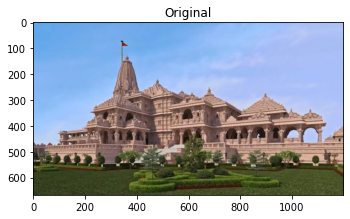

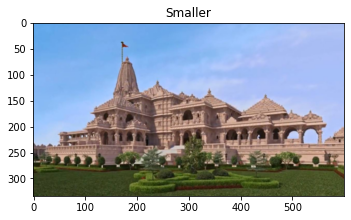

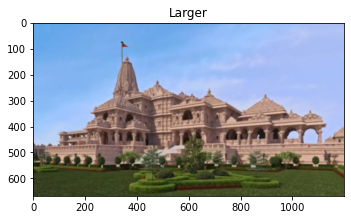

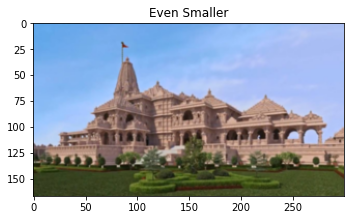

In [4]:
image = cv2.imread('Ram.jpg')

smaller = cv2.pyrDown(image
larger = cv2.pyrUp(smaller)

imshow("Original", image)
imshow('Smaller', smaller)
imshow('Larger', larger)

even_smaller = cv2.pyrDown(smaller)
imshow('Even Smaller', even_smaller)

# **Cropping**

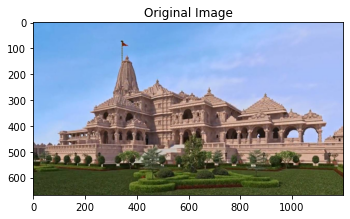

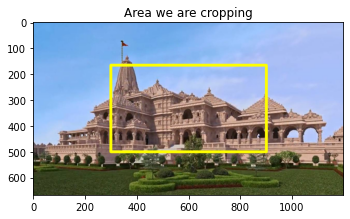

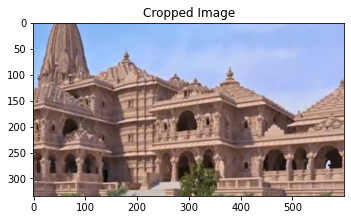

In [5]:
image = cv2.imread('Ram.jpg')

# Get our image dimensions
height, width = image.shape[:2]

# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
# using 0.25 to get the x,y position that is 1/4 down from the top left (0,0)
start_row, start_col = int(height * .25), int(width * .25)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

# Simply use indexing to crop out the rectangle we desire
cropped = image[start_row:end_row , start_col:end_col]

imshow("Original Image", image)

# The cv2.rectangle function draws a rectangle over our image (in-place operation)
copy = image.copy()
cv2.rectangle(copy, (start_col,start_row), (end_col,end_row), (0,255,255), 10)

imshow("Area we are cropping", copy)

imshow("Cropped Image", cropped) 